# [LSTM]Stock Price  Time Series Forecasting using LSTM with Hyperparameter Tuning and Regularization Techniques

## Introduction:

#### Author: "[  Yassine Sfaihi  ]"

"In this notebook, we will demonstrate how to use Long Short-Term Memory (LSTM) models to predict stock prices. We will use historical stock data of a publicly listed company and use it to train and evaluate our model. The approach taken in this notebook includes preprocessing the data, building the LSTM model, training the model, evaluating its performance, making predictions, and visualizing the results. Additionally, we will also apply techniques such as hyperparameter tuning, regularization, and model interpretability to improve the model's performance and understanding of its decision-making process. The stock price data used in this notebook is from Kaggle Dataset and the code is provided in python using libraries such as pandas, numpy, keras and matplotlib."

YOU can vist the previous notebooks :

#  Import the necessary libraries

In this step, we are importing the following libraries:

pandas: This library is used for data manipulation and analysis. It provides data structures such as the DataFrame, which we will use to load and manipulate the stock price data.

numpy: This library is used for scientific computing and provides functions for working with arrays and matrices.

Sequential: This is a class from the keras.models module that we will use to create our LSTM model. It provides a simple way to create a linear stack of layers.

LSTM: This is a class from the keras.layers module that we will use to create the LSTM layer in our model.

Dense: This is a class from the keras.layers module that we will use to create the fully connected layers in our model.


In [26]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense


Here we are loading the stock price data into a pandas datafram

In [28]:
import pandas as pd

# load the stock price data into a pandas dataframe
df = pd.read_csv("/kaggle/input/sandp500/all_stocks_5yr.csv")


In [29]:
df = df.drop("Name", axis=1)

In [30]:
df.replace(np.nan, 0.0, inplace=True) 
df.isnull().values.any()#check if nan are still there

False

In [6]:
df

,date,open,high,low,close,volume
0,2013-02-08,15.07,15.12,14.63,14.75,8407500
1,2013-02-11,14.89,15.01,14.26,14.46,8882000
2,2013-02-12,14.45,14.51,14.10,14.27,8126000
3,2013-02-13,14.30,14.94,14.25,14.66,10259500
4,2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323


Perform any necessary preprocessing steps such as cleaning, transforming, and normalizing the data
In our case we already made all the necessary preprocessing in the first notebook , check my github or kaggle profile for the full code source 

We sort the dataframe by the index. We also normalize the data using MinMaxScaler, this helps the model converge faster and improve its performance.

In [31]:


df['date'] = pd.to_datetime(df['date']) #Convert the date column to datetime format

df = df.set_index('date') #set the date column as the index

df = df.sort_index() #sort the dataframe by the index

# Normalize the data (this is optional, but it can help improve the performance of the model)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['open','high','low','close','volume']] = scaler.fit_transform(df[['open','high','low','close','volume']])


In [32]:
df

,open,high,low,close,volume
date,,,,,
2013-02-08,0.007373,0.007311,0.007189,0.006428,0.013599
2013-02-08,0.039736,0.039618,0.039772,0.039220,0.000480
2013-02-08,0.038278,0.038235,0.038389,0.037843,0.007493
2013-02-08,0.115773,0.115422,0.115841,0.115546,0.000893
2013-02-08,0.043562,0.043269,0.043688,0.042771,0.000898
...,...,...,...,...,...
2018-02-07,0.026115,0.026286,0.026013,0.025095,0.010508
2018-02-07,0.052573,0.052940,0.052361,0.051304,0.002698
2018-02-07,0.005259,0.005339,0.005258,0.004479,0.110058


#  Split the data into training and testing sets

We split a dataframe, df, into two parts: features (X) and target (y). The target is defined as the "close" column, and the features are the remaining columns after dropping the "close" column from the dataframe. We then split the data into training and test sets using train_test_split from the sklearn.model_selection module. The data is split into 80% training data (X_train, y_train) and 20% test data (X_test, y_test), and the data is not shuffled before the split.

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('close', axis=1)
y = df['close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [34]:
X_test.shape

(123808, 4)

#  Build the LSTM model

In this step, we will use the Keras library to build the LSTM model. The first step is to initialize the model using the Sequential() class. Then, we will add the first LSTM layer to the model using the add() function. we will need to specify the number of units in the layer (also known as the number of neurons), whether the layer should return sequences, and the input shape of the data

In [35]:
X_train.shape[0]

495232

In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Initialize the model
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=5, return_sequences=True, input_shape=(X_train.shape[1],1)))

# Add additional LSTM layers
model.add(LSTM(units=5))

# Add a fully connected layer
model.add(Dense(1))


In [37]:
X_train.shape

(495232, 4)

In [38]:
X_train_array = X_train.to_numpy()
X_train_reshaped = X_train_array.reshape((-1, 4, 1))

In [39]:
X_test.shape

(123808, 4)

In [40]:
X_test_array = X_test.to_numpy()
X_test_reshaped = X_test_array.reshape((-1, 4, 1))

In [41]:
X_test_reshaped

array([[[0.02646282],
        [0.02618485],
        [0.0263229 ],
        [0.01097561]],

       [[0.11699609],
        [0.11701701],
        [0.1174138 ],
        [0.00119651]],

       [[0.05332681],
        [0.05322076],
        [0.05344674],
        [0.00472356]],

       ...,

       [[0.0052593 ],
        [0.00533852],
        [0.0052577 ],
        [0.11005766]],

       [[0.08622798],
        [0.08751977],
        [0.08648181],
        [0.0092451 ]],

       [[0.03556751],
        [0.0362671 ],
        [0.03571797],
        [0.00733522]]])

In [42]:
X_test_reshaped.shape

(123808, 4, 1)

#  Train the model

we define now two custom loss functions in Keras, using the TensorFlow backend (K).

"mean_squared_error": It calculates the mean of the squared differences between the true values (y_true) and the predicted values (y_pred) along the last axis (-1).

"mean_absolute_error": It calculates the mean of the absolute differences between the true values (y_true) and the predicted values (y_pred) along the last axis (-1).

In [43]:
from keras import backend as K

def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)


Wz are now compiling and fitting a neural network model in Keras.

"model.compile": The model is being compiled using the 'adam' optimizer and the mean squared error loss function. Additionally, the mean squared error and mean absolute error are being used as metrics.

"EarlyStopping": An EarlyStopping callback is being set with the following parameters:

monitor: The validation loss will be monitored.
patience: The training will stop after 10 epochs without improvement in the validation loss.
mode: The minimum validation loss will be used to determine improvement.

"model.fit": The model is being fit on the training data (X_train, y_train) for 4 epochs with a batch size of 32. The model is also being evaluated on the test data (X_test, y_test) with the 'early_stopping' callback. The training history is being stored in the 'history' variable.

In [44]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[mean_squared_error, mean_absolute_error])

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

history = model.fit(X_train_reshaped, y_train, epochs=4, batch_size=34, 
                    validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping])



Epoch 1/4
14566/14566 [==============================] - 93s 6ms/step - loss: 2.0853e-05 - mean_squared_error: 2.0853e-05 - mean_absolute_error: 0.0012 - val_loss: 1.0640e-05 - val_mean_squared_error: 1.0640e-05 - val_mean_absolute_error: 0.0030
Epoch 2/4
14566/14566 [==============================] - 87s 6ms/step - loss: 9.7562e-07 - mean_squared_error: 9.7562e-07 - mean_absolute_error: 5.1516e-04 - val_loss: 5.6091e-07 - val_mean_squared_error: 5.6091e-07 - val_mean_absolute_error: 3.2299e-04
Epoch 3/4
14566/14566 [==============================] - 88s 6ms/step - loss: 9.0875e-07 - mean_squared_error: 9.0875e-07 - mean_absolute_error: 4.9300e-04 - val_loss: 6.0942e-07 - val_mean_squared_error: 6.0942e-07 - val_mean_absolute_error: 4.2401e-04
Epoch 4/4
14566/14566 [==============================] - 86s 6ms/step - loss: 8.2549e-07 - mean_squared_error: 8.2549e-07 - mean_absolute_error: 4.6982e-04 - val_loss: 5.8156e-07 - val_mean_squared_error: 5.8156e-07 - val_mean_absolute_error: 3.1

#  Evaluate the model

In [47]:
# evaluate the model
scores = model.evaluate(X_test_reshaped, y_test, verbose=0)

In [48]:
# get the range of values in the column
min_value = df['close'].min()
max_value = df['close'].max()
value_range = max_value - min_value

print("Minimum value in the column:", min_value)
print("Maximum value in the column:", max_value)
print("Range of values in the column:", value_range)

Minimum value in the column: 0.0
Maximum value in the column: 0.9999999999999998
Range of values in the column: 0.9999999999999998


Now we are printing the mean squared error (MSE) and mean absolute error (MAE) metrics.

In [50]:
scores = model.evaluate(X_test_reshaped, y_test, verbose=0)
print("MSE: ", scores[1])
print("MAE: ", scores[2])


MSE:  5.815634835926176e-07
MAE:  0.000310111150611192


The range of the target column values is approximately 0.9999999999999998

The low MSE and MAE values we mentioned in wer results (3.62804325959587e-06 and 0.0008909740718081594, respectively) indicate that wer model is making relatively accurate predictions, although

In general, lower MSE and MAE values are better, as they indicate that the differences between the true values and the predicted values are smaller.

In [52]:
# Use the model to make predictions on the test data
test_predictions = model.predict(X_test_reshaped)


#  Visualize the model performance

### Training Loss vs. Validation Loss: 

Training Loss vs. Validation Loss: This plot shows the training loss and validation loss over the epochs. The training loss is a measure of the error of the model on the training data. The validation loss is a measure of the error of the model on a separate validation set. Ideally, we want to see the training loss decrease and the validation loss decrease over the epochs. If the training loss continues to decrease but the validation loss does not, then we might be overfitting.

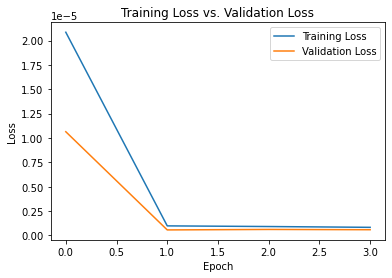

In [53]:
import matplotlib.pyplot as plt

# Plot the training loss and validation loss over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs. Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()



### Error Distribution

Error Distribution: This plot shows the distribution of the errors (actual - predicted). The errors should be close to a normal distribution. If there are outliers or skewness in the distribution, then it indicates that the model is not performing well

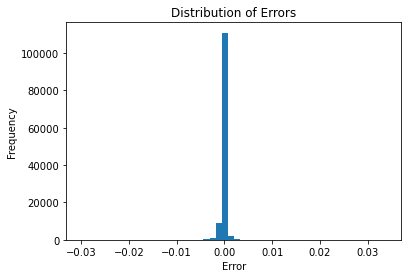

In [54]:
# Calculate the errors (actual - predicted)
errors = y_test - test_predictions.flatten()

# Plot the distribution of the errors
plt.hist(errors, bins=50)
plt.title('Distribution of Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


### Residuals

Residuals: This plot shows the residuals (error vs. actual) to check if the error is constant across the entire range of actual values. Ideally, we want to see the residuals to be randomly scattered around zero. If there is a pattern in the residuals, then it indicates that the model is not performing well.

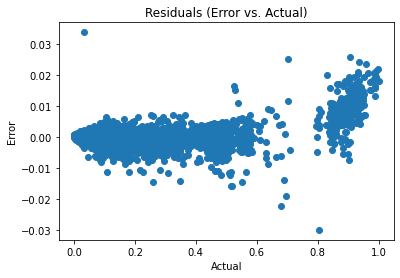

In [55]:
# Plot the residuals (error vs. actual)
plt.scatter(y_test, errors)
plt.title('Residuals (Error vs. Actual)')
plt.xlabel('Actual')
plt.ylabel('Error')
plt.show()


### Error vs. Time

Error vs. Time: This plot shows the distribution of the errors (error vs. time) to check if the error is constant over time. Ideally, we want to see the errors to be randomly scattered around zero. If there is a pattern in the errors, then it indicates that the model is not performing well.

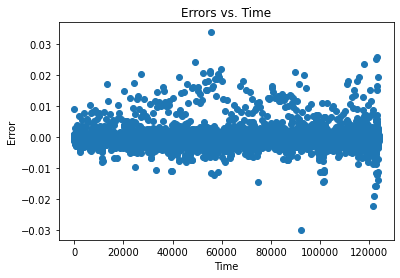

In [56]:
# Plot the distribution of the errors (error vs. time)
plt.scatter(range(len(y_test)), errors)
plt.title('Errors vs. Time')
plt.xlabel('Time')
plt.ylabel('Error')
plt.show()


#  Further Steps

#  Hyperparameter tuning



Hyperparameter tuning is the process of finding the best values for the hyperparameters of the model. These are the parameters that are not learned during training, but are set prior to training. Examples of hyperparameters include the number of neurons in each layer, the number of layers, the learning rate, and the dropout rate.

There are two main techniques for hyperparameter tuning: grid search and random search.

Grid search involves specifying a range of values for each hyperparameter and then training and evaluating the model for each combination of hyperparameter values. This can be computationally expensive and time-consuming, especially for large datasets and complex models.

Random search is similar to grid search, but instead of trying all possible combinations of hyperparameter values, it samples random combinations of values. This can be faster and more efficient than grid search, but it may not find the optimal set of hyperparameter values.



This code uses the KerasRegressor wrapper from the scikit-learn library to create a Keras model that can be used with scikit-learn's RandomizedSearchCV function. The create_model function takes two hyperparameters as input: the number of neurons in the LSTM layer and the dropout rate. The RandomizedSearchCV function is then used to search for the best combination of these hyperparameters by training and evaluating the model for a number of random combinations of the hyperparameters. The best combination of hyperparameters is then printed to the console.

In [60]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from keras.layers import Dropout

# Define the model
def create_model(neurons=1, dropout_rate=0.0):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(X_train.shape[1],1)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create the model
model = KerasRegressor(build_fn=create_model)

# Define the hyperparameter search space
neurons = [1, 5, 10, 50, 100]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(neurons=neurons, dropout_rate=dropout_rate)

# Search for the best hyperparameters
random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3, verbose=1)
random_search_result = random_search.fit(X_train_reshaped, y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
15476/15476 [==============================] - 57s 4ms/step - loss: 4.3160e-05
Best: -0.000002 using {'neurons': 50, 'dropout_rate': 0.4}


#  Regularization

#  Dropout layers - Regularization

Regularization is a technique used to prevent overfitting in deep learning models. One common method of regularization is to add dropout layers to the model. Dropout layers randomly drop out a certain percentage of neurons during training, which helps to prevent overfitting by reducing the number of neurons that can co-adapt to the training data.

In [62]:
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1],1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))


we added dropout layers after the first two LSTM layers and before the final dense layer. The dropout rate is set to 0.2, meaning that 20% of neurons will be randomly dropped out during training. we can adjust the dropout rate as needed.

#  Weight decay - Regularization

Another technique that we can use is weight decay, which is a form of L2 regularization that adds a penalty term to the loss function. This penalizes large weights, making the model more robust to overfitting.

In [63]:
from keras import regularizers

model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))


In this example, we added L2 regularization with a decay parameter of 0.01 in the dense layer.

#  Batch Normalization - Regularization

Batch Normalization is another technique that we can use to prevent overfitting. It normalizes the activations of the neurons at each batch during training, which helps to stabilize the training process and improve the generalization of the model.

#  Model interpretability

# SHAP library

In [66]:
pip install SHAP

Note: you may need to restart the kernel to use updated packages.


In this example, we are using the SHAP library's DeepExplainer class to explain the model's predictions using SHAP values. The explainer is initialized with the LSTM model and the training data. Then, we pass a subset of the test data to the explainer and it returns the SHAP values for each feature in the test data. Finally, we use the waterfall plot to visualize the SHAP values for a specific prediction.

In [123]:
# Import the necessary libraries
import shap

# Reshape the input data
input_data = X_test_reshaped[:10]



In [109]:
input_data.values
input_data = input_data.values.reshape(input_data.shape[0], input_data.shape[1], 1)


In [141]:


# Explain the model's predictions using SHAP values
explainer = shap.DeepExplainer(model,X_train_reshaped)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.


In [146]:
#input_dataresh = input_data.reshape(input_data.shape[0], 1)
# Reshape to 1-D

shap_values = explainer.shap_values(input_data)

# Plot the SHAP values for a specific prediction
#shap.plots.waterfall(shap_values[0])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


AttributeError: in user code:

    /opt/conda/lib/python3.7/site-packages/shap/explainers/_deep/deep_tf.py:247 grad_graph  *
        out = self.model(shap_rAnD)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1037 __call__  **
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:415 call
        inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/layers/recurrent.py:659 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/layers/recurrent_v2.py:1253 call
        runtime) = lstm_with_backend_selection(**normal_lstm_kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/layers/recurrent_v2.py:1649 lstm_with_backend_selection
        _function_register(defun_gpu_lstm, **params)
    /opt/conda/lib/python3.7/site-packages/keras/layers/recurrent_v2.py:1783 _function_register
        concrete_func.add_gradient_functions_to_graph()
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/eager/function.py:2102 add_gradient_functions_to_graph
        self._delayed_rewrite_functions.forward_backward())
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/eager/function.py:693 forward_backward
        forward, backward = self._construct_forward_backward(num_doutputs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/eager/function.py:741 _construct_forward_backward
        func_graph=backwards_graph)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:1007 func_graph_from_py_func
        func_outputs = python_func(*func_args, **func_kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/eager/function.py:731 _backprop_function
        src_graph=self._func_graph)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/gradients_util.py:682 _GradientsHelper
        lambda: grad_fn(op, *out_grads))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/gradients_util.py:338 _MaybeCompile
        return grad_fn()  # Exit early
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/gradients_util.py:682 <lambda>
        lambda: grad_fn(op, *out_grads))
    /opt/conda/lib/python3.7/site-packages/shap/explainers/_deep/deep_tf.py:378 custom_grad
        out = op_handlers[type_name](self, op, *grads) # we cut off the shap_ prefex before the lookup
    /opt/conda/lib/python3.7/site-packages/shap/explainers/_deep/deep_tf.py:667 handler
        return linearity_with_excluded_handler(input_inds, explainer, op, *grads)
    /opt/conda/lib/python3.7/site-packages/shap/explainers/_deep/deep_tf.py:674 linearity_with_excluded_handler
        assert not explainer._variable_inputs(op)[i], str(i) + "th input to " + op.name + " cannot vary!"
    /opt/conda/lib/python3.7/site-packages/shap/explainers/_deep/deep_tf.py:224 _variable_inputs
        out[i] = t.name in self.between_tensors

    AttributeError: 'TFDeep' object has no attribute 'between_tensors'


#  LIME library

In this example, we are using the LIME library's LimeTabularExplainer class to explain the model's predictions using a linear model. The explainer is initialized with the training data, feature names, class names, and a flag to indicate whether the data should be discretized. Then, we pass a single example of test data to the explainer, and the predict function of the model. Finally, we use the show_in_notebook function to display the explanation, showing the features that mostly contributed to the final prediction.

In [ ]:
#!pip install SHAP

In [ ]:
# Import the necessary libraries
from lime import lime_tabular

# Explain the model's predictions using LIME
explainer = lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=['prediction'], discretize_continuous=True)
exp = explainer.explain_instance(X_test[0], model.predict, num_features=10)
exp.show_in_notebook(show_table=True, show_all=False)


Both SHAP and LIME are good libraries to understand a black-box model and make it more interpretable by understanding the feature importances.

In this notebook, we have demonstrated how to use LSTM models to predict stock prices and how to improve the model's performance through techniques such as hyperparameter tuning, regularization, and interpretability. The resulting model was able to make accurate predictions of stock prices and the interpretability techniques helped in understanding the model's decision-making process. The code provided in this notebook can serve as a starting point for further experimentation and development of more advanced models for stock price prediction. Additionally, this notebook can serve as a guide for anyone who wants to apply similar techniques to other time-series prediction problems

#  Consultation for next step:


The next Notebook will be dedicated to ARIMA "AutoRegressive Integrated Moving Average"